<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Nikoo Moradi

**Student ID**: 400101934





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [77]:
import numpy as np
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression


import torch
import torch.nn as nn
import torch.optim as optim


In [126]:
# import necessary libraries

    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!


class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=100, use_gpu=False):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of epochs for training
        self.weights = None  # Weights for logistic regression, to be initialized later
        self.use_gpu = use_gpu and torch.cuda.is_available()  # Use GPU if available and requested
        if self.use_gpu:
            self.device = torch.device("cuda")
        else:
            self.device = torch.device("cpu")

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def loss(self, h, y):
        return -torch.mean(y * torch.log(h) + (1 - y) * torch.log(1 - h))

    def fit(self, X_train, y_train, print_loss=True):
        # Convert arrays to torch tensors
        X_train = torch.tensor(X_train.astype(np.float32)).to(self.device)
        y_train = torch.tensor(y_train.astype(np.float32)).to(self.device)

        # Initialize weights
        self.weights = torch.zeros(X_train.shape[1], dtype=torch.float32).to(self.device)
        self.bias = torch.ones(1, dtype=torch.float32, device=self.device)

        # Training loop
        for epoch in range(self.epochs):
            # Forward pass
            z = torch.matmul(X_train, self.weights)
            h = self.sigmoid(z + self.bias)
            # Calculate loss
            l = self.loss(h, y_train)

            dW = torch.matmul(X_train.t(), (h - y_train)) / X_train.size(0)
            db = torch.sum(h - y_train) / X_train.size(0)

            self.weights -= self.lr * dW
            self.bias -= self.lr * db

            if print_loss and (epoch+1) % (self.epochs // 10) == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l.item()}")

    def predict(self, X):
        prob = self.predict_proba(X)
        return (prob >= 0.5)  # Return 1 if prob is greater than or equal to 0.5 else 0

    def predict_proba(self, X):
        # Convert to tensor
        X = torch.tensor(X.astype(np.float32)).to(self.device)
        # Compute probability
        z = torch.matmul(X, self.weights)
        prob = self.sigmoid(z + self.bias)
        return prob.detach()




**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [72]:
# Your code goes here!


# Load your data
df = pd.read_csv('/content/Logistic_question.csv')
df['Target'] = (df['Target'] > 0.5).astype(int)

print("Shape of the dataset:", df.shape)
print("\n\nDataset information:")
print(df.info())
print("\n\nColumns in the dataset:")
print(df.columns)


X = df.drop('Target', axis=1).values
y = df['Target'].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=400101934)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Shape of the dataset: (400, 8)


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  400 non-null    int64  
 1   Feature 2  400 non-null    float64
 2   Feature 3  400 non-null    int64  
 3   Feature 4  400 non-null    float64
 4   Feature 5  400 non-null    float64
 5   Feature 6  400 non-null    float64
 6   Feature 7  400 non-null    int64  
 7   Target     400 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.1 KB
None


Columns in the dataset:
Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Target'],
      dtype='object')
Training set size: (320, 7)
Test set size: (80, 7)


In [73]:
# Create an instance of MyLogisticRegression
model = MyLogisticRegression(lr=5e-2, epochs=1024, use_gpu=True)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)
# y_test = (y_test > 0.5).astype(int)

# You might want to check the accuracy using the actual labels from y_test
predictions = predictions

# Evaluation Metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'\n\nAccuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Epoch 102/1024, Loss: 0.2579129934310913
Epoch 204/1024, Loss: 0.22045278549194336
Epoch 306/1024, Loss: 0.20152883231639862
Epoch 408/1024, Loss: 0.18981564044952393
Epoch 510/1024, Loss: 0.1817179173231125
Epoch 612/1024, Loss: 0.1757262647151947
Epoch 714/1024, Loss: 0.17108626663684845
Epoch 816/1024, Loss: 0.16737394034862518
Epoch 918/1024, Loss: 0.16433027386665344
Epoch 1020/1024, Loss: 0.16178688406944275


Accuracy: 93.75%
Precision: 93.42%
Recall: 100.00%
F1 Score: 96.60%


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

### 1\. **Accuracy**

*   **Definition**: Proportion of correct predictions among the total number of cases.
*   **Useful**: Best for balanced classes, providing a quick view of overall performance.

### 2\. **Precision**

*   **Definition**: Ratio of correctly predicted positive observations to the total predicted positives.
*   **Useful**: Important in scenarios where false positives are costly, such as email spam detection.

### 3\. **Recall (Sensitivity)**

*   **Definition**: Ratio of correctly predicted positive observations to all actual positives.
*   **Useful**: Crucial where missing a positive is costly, such as in medical diagnosis.

### 4\. **F1 Score**

*   **Definition**: Weighted average of Precision and Recall.
*   **Useful**: Best when there is an uneven class distribution and both types of prediction errors are similarly costly, such as in customer churn prediction.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# Your code goes here!


builtin_model = LogisticRegression()
builtin_model.fit(X_train, y_train)

builtin_predictions = builtin_model.predict(X_test)

builtin_accuracy = accuracy_score(y_test, builtin_predictions)
builtin_precision = precision_score(y_test, builtin_predictions)
builtin_recall = recall_score(y_test, builtin_predictions)
builtin_f1 = f1_score(y_test, builtin_predictions)

print(f'Accuracy using built-in logestic regression: {builtin_accuracy * 100:.2f}%')
print(f'Precision using built-in logestic regression: {builtin_precision * 100:.2f}%')
print(f'Recall using built-in logestic regression: {builtin_recall * 100:.2f}%')
print(f'F1 Score using built-in logestic regression: {builtin_f1 * 100:.2f}%')



Accuracy using built-in logestic regression: 93.75%
Precision using built-in logestic regression: 94.59%
Recall using built-in logestic regression: 98.59%
F1 Score using built-in logestic regression: 96.55%


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

### Performance Comparison:

*   **Accuracy**: Built-in model (93.75%) outperforms the custom model (85.00%).
*   **Precision**: Custom model is slightly higher (96.83% vs. 94.59%).
*   **Recall**: Built-in model significantly higher (98.59% vs. 85.92%).
*   **F1 Score**: Built-in model has a better balance (96.55% vs. 91.04%).

### Key Parameters of `scikit-learn` Logistic Regression:

*   **`penalty`**: Type of regularization (e.g., `l1`, `l2`) to prevent overfitting.
*   **`C`**: Inverse of regularization strength; lower values mean stronger regularization.
*   **`solver`**: Optimization algorithm choice (e.g., `liblinear`, `saga`), affects convergence.
*   **`max_iter`**: Maximum iterations for solvers to converge, influencing model precision.
*   **`class_weight`**: Adjusts weights for classes, useful in handling imbalanced data.

### Impact of Parameters:

*   Regularization (via `penalty` and `C`) manages overfitting, crucial for performance on unseen data.
*   Solver choice affects the speed and accuracy of model training.
*   Adjusting `max_iter` and `class_weight` can fine-tune the model to specific data characteristics, improving overall performance.



# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:


class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, input_dim, output_dim, lr=0.001, use_gpu=False):
        self.lr = lr  # Learning rate
        self.input_dim = input_dim  # Number of features
        self.output_dim = output_dim  # Number of classes
        self.use_gpu = use_gpu and torch.cuda.is_available()  # GPU availability

        # Model setup
        self.model = nn.Linear(input_dim, output_dim)
        if self.use_gpu:
            self.model.cuda()  # Move model to GPU if available

        # Loss function and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

    def fit(self, X_train, y_train, epochs=100):
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.int64)
        if self.use_gpu:
            X_train, y_train = X_train.cuda(), y_train.cuda()

        for epoch in range(epochs):
            self.optimizer.zero_grad()  # Reset gradients
            outputs = self.model(X_train)  # Forward pass
            loss = self.criterion(outputs, y_train)  # Compute loss
            loss.backward()  # Backward pass
            self.optimizer.step()  # Update weights

            # if (epoch+1) % 10 == 0:
                # print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        if self.use_gpu:
            X = X.cuda()
        outputs = self.model(X)
        _, predicted = torch.max(outputs.data, 1)
        return predicted.cpu().numpy() if self.use_gpu else predicted.numpy()




In [86]:
# import necessary libraries

    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!


class MyMultinomialLogisticRegression:
    def __init__(self, input_dim, output_dim, lr=0.01, epochs=100, use_gpu=False):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of epochs for training
        self.weights = None  # Weights for logistic regression, to be initialized later
        self.input_dim, self.output_dim = input_dim, output_dim
        self.use_gpu = use_gpu and torch.cuda.is_available()  # Use GPU if available and requested
        if self.use_gpu:
            self.device = torch.device("cuda")
        else:
            self.device = torch.device("cpu")

    def softmax(self, z):
        return torch.exp(z) / torch.sum(torch.exp(z), dim=1, keepdim=True)

    def loss(self, h, y):
        return -torch.mean(torch.log(h)[:, y])

    def fit(self, X_train, y_train):
        # Convert arrays to torch tensors
        X_train = torch.tensor(X_train.astype(np.float32)).to(self.device)
        y_train = torch.tensor(y_train).to(self.device)

        # Initialize weights
        self.weights = torch.zeros((self.input_dim, self.output_dim), dtype=torch.float32).to(self.device)
        self.bias = torch.ones(self.output_dim, dtype=torch.float32, device=self.device)

        # Training loop
        for epoch in range(self.epochs):
            # Forward pass
            z = torch.matmul(X_train, self.weights)
            h = self.softmax(z + self.bias)
            # Calculate loss
            l = self.loss(h, y_train)
            one_hot_y = torch.eye(self.output_dim)[y_train].to(self.device)

            dW = torch.matmul(X_train.t(), (h - one_hot_y)) / X_train.size(0)
            db = torch.sum(h - one_hot_y) / X_train.size(0)

            self.weights -= self.lr * dW
            self.bias -= self.lr * db

            # if (epoch+1) % (self.epochs // 100) == 0:
                # print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l.item()}")

    def predict(self, X):
        prob = self.predict_proba(X)
        return torch.argmax(prob, dim=1)  # Return 1 if prob is greater than or equal to 0.5 else 0

    def predict_proba(self, X):
        # Convert to tensor
        X = torch.tensor(X.astype(np.float32)).to(self.device)
        # Compute probability
        z = torch.matmul(X, self.weights)
        prob = self.softmax(z + self.bias)
        return prob.detach()




**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [87]:
# Your code goes here!

data = pd.read_csv('/content/Logistic_question.csv')

# You can adjust 'i' to change the number of quantization levels
for i in range(2, 11):
    print(f"\nTesting with {i} quantization levels:")
    # Quantize the target variable
    data['Quantized_Target'] = pd.qcut(data['Target'], q=i, labels=False, duplicates='drop')

    # Split the data into features and target
    X = data.drop(['Target', 'Quantized_Target'], axis=1).values
    y = data['Quantized_Target'].values

    # Splitting the dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400101934)

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the dimensions for the model
    input_dim = X_train.shape[1]
    output_dim = len(np.unique(y_train))  # Number of unique classes

    # Create an instance of MyMultinomialLogisticRegression
    model = MyMultinomialLogisticRegression(input_dim, output_dim, lr=5e-2, use_gpu=True, epochs=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    Multinomial_predictions = model.predict(X_test)

    # Calculate accuracy (You can add more metrics as needed)
    Multinomial_accuracy = accuracy_score(Multinomial_predictions, y_test)
    Multinomial_precision = precision_score(y_test, Multinomial_predictions, average = 'macro')
    Multinomial_recall = recall_score(y_test, Multinomial_predictions, average = 'macro')
    Multinomial_f1 = f1_score(y_test, Multinomial_predictions, average = 'macro')

    print(f'Accuracy with {i} levels: {Multinomial_accuracy * 100:.2f}%')
    print(f'Precision with {i} levels: {Multinomial_precision * 100:.2f}%')
    print(f'Recall with {i} levels: {Multinomial_recall * 100:.2f}%')
    print(f'F1 Score with {i} levels: {Multinomial_f1 * 100:.2f}%')




Testing with 2 quantization levels:
Accuracy with 2 levels: 81.25%
Precision with 2 levels: 81.44%
Recall with 2 levels: 81.14%
F1 Score with 2 levels: 81.18%

Testing with 3 quantization levels:
Accuracy with 3 levels: 61.25%
Precision with 3 levels: 73.74%
Recall with 3 levels: 67.23%
F1 Score with 3 levels: 55.24%

Testing with 4 quantization levels:
Accuracy with 4 levels: 51.25%
Precision with 4 levels: 49.94%
Recall with 4 levels: 52.84%
F1 Score with 4 levels: 43.41%

Testing with 5 quantization levels:
Accuracy with 5 levels: 42.50%
Precision with 5 levels: 50.74%
Recall with 5 levels: 46.93%
F1 Score with 5 levels: 37.64%

Testing with 6 quantization levels:
Accuracy with 6 levels: 37.50%
Precision with 6 levels: 43.25%
Recall with 6 levels: 36.64%
F1 Score with 6 levels: 27.58%

Testing with 7 quantization levels:
Accuracy with 7 levels: 37.50%
Precision with 7 levels: 23.65%
Recall with 7 levels: 35.99%
F1 Score with 7 levels: 27.84%

Testing with 8 quantization levels:
Acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with 9 levels: 33.75%
Precision with 9 levels: 27.31%
Recall with 9 levels: 35.80%
F1 Score with 9 levels: 27.06%

Testing with 10 quantization levels:
Accuracy with 10 levels: 22.50%
Precision with 10 levels: 13.33%
Recall with 10 levels: 25.39%
F1 Score with 10 levels: 16.92%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 107MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [93]:
# Your code goes here!
df2 = pd.read_csv("adult.csv")
df2.replace("?", np.nan, inplace=True)

print("The number of null entries per column:\n",df2.isnull().sum())
print("\nData type of each column:\n",df2.dtypes)
print("\nTotal number of null entries:", (df2.isnull().sum()).sum())


The number of null entries per column:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Data type of each column:
 age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Total number of null entries: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

### 1\. **Deletion**

*   **Description**: Remove rows or columns with missing values.
*   **Use When**: Large datasets where losing some data won't compromise the overall analysis.

### 2\. **Imputation with Mean/Median/Mode**

*   **Description**: Replace missing values with the central tendency measure of the column.
*   **Use When**: The missing data is numeric and missing at random, especially if the data distribution is not heavily skewed.

### 3\. **Predictive Imputation**

*   **Description**: Use regression or classification models to estimate missing values based on other features.
*   **Use When**: There are sufficient and relevant features that correlate with the missing data.

### 4\. **Using an Algorithm that Supports Missing Values**

*   **Description**: Opt for machine learning algorithms designed to handle missing data directly, like certain decision trees.
*   **Use When**: You prefer not to manipulate data before modeling and need a straightforward approach.

### 5\. **Imputation Using Multivariate Techniques**

*   **Description**: Apply complex imputation methods like multiple imputation or k-nearest neighbors.
*   **Use When**: Relationships between features are strong and can be leveraged to accurately predict missing values.

### Decision Factors:

Choose a method based on:

*   **Data Size and Missingness**: More data allows for deletion; less data may require imputation.
*   **Data Type**: Numerical or categorical data can dictate the choice of imputation technique.
*   **Missing Data Mechanism**: Understand if data is missing at random or not, as this affects the suitability of the method.
*   **Modeling Impact**: Consider how the method might affect subsequent analysis or model accuracy.

**Task:** Handle null entries using your best method.




In [120]:
# Your code goes here!

df2['workclass'].fillna(df2['workclass'].mode()[0], inplace=True)
df2['occupation'].fillna(df2['occupation'].mode()[0], inplace=True)
df2['native-country'].fillna(df2['native-country'].mode()[0], inplace=True)

print("The number of null entries per column:\n",df2.isnull().sum())

print("\nTotal number of null entries:", (df2.isnull().sum()).sum())


The number of null entries per column:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Total number of null entries: 0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [98]:
X = df2.drop('income', axis=1)
y = df2['income']

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Creating a transformer to encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)  # Apply StandardScaler only to numerical features
    ])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid
param_grid = {
    'classifier__C': np.logspace(-4, 4, 10),  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],      # Norms used for regularization
    'classifier__max_iter': [100, 200, 300]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best model, parameters, and scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predictions and accuracy
train_predictions = grid_search.predict(X_train)
test_predictions = grid_search.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'classifier__C': 2.782559402207126, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Best cross-validation score: 0.85
Train Accuracy: 85.09%
Test Accuracy: 85.60%


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [136]:
from sklearn.preprocessing import LabelEncoder

split_size = int(len(X_train) / 10)

label_encoder = LabelEncoder()
for column in df2.select_dtypes(include=['object']).columns:
       df2[column] = label_encoder.fit_transform(df2[column])

X = df2.drop('income', axis=1).values
y = df2['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

acc_models = []

for i in range(10):
    start = i * split_size
    end = start + split_size if i < 9 else len(X_train)
    X_part = X_train_scaled[start:end]
    y_part = y_train[start:end]

    model = MyLogisticRegression(epochs=1000, lr=1e-2, use_gpu=True)
    model.fit(X_part, y_part, print_loss=False)
    models.append(model)

    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    acc_models.append(accuracy)

print('Accuracy for each model:')
acc_models

Accuracy for each model:


[0.8250588596581021,
 0.8211690039922203,
 0.8204524516327157,
 0.8246494011669567,
 0.8241375780530249,
 0.8224997440884431,
 0.8235233903163067,
 0.8210666393694339,
 0.8242399426758112,
 0.8260825058859658]

In [141]:
def majority_voting(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    mean_pred = np.mean(predictions, axis=0)
    ensemble_pred = mean_pred > 0.5
    return ensemble_pred.astype(int)

def average_probabilities(models, X_test):
    probs = np.array([model.predict_proba(X_test) for model in models])
    mean_prob = np.mean(probs, axis=0)
    ensemble_pred = mean_prob > 0.5
    return ensemble_pred.astype(int)

def weighted_average_probabilities(models, X_test, acc_models):
    weights = acc_models
    probabilities = np.array([model.predict_proba(X_test) for model in models])
    weighted_average_prob = np.average(probabilities, axis=0, weights=weights)
    ensemble_predictions = weighted_average_prob >= 0.5
    return ensemble_predictions.astype(int)


In [143]:
# # Evaluate ensemble methods on test set
# X_test_scaled = scaler.transform(X_test)
y_pred_majority_voting = majority_voting(models, X_test_scaled)
y_pred_average_probabilities = average_probabilities(models, X_test_scaled)
y_pred_weighted_average_probabilities = weighted_average_probabilities(models, X_test_scaled, acc_models)

# Calculate test accuracy for each ensemble method
accuracy_majority_voting = accuracy_score(y_test, y_pred_majority_voting)
accuracy_average_probabilities = accuracy_score(y_test, y_pred_average_probabilities)
accuracy_weighted_average_probabilities = accuracy_score(y_test, y_pred_weighted_average_probabilities)

print(f"Test Accuracy (Majority Voting): {accuracy_majority_voting * 100}")
print(f"Test Accuracy (Average Probabilities): {accuracy_average_probabilities * 100}")
print(f"Test Accuracy (Weighted Average Probabilities): {accuracy_weighted_average_probabilities * 100}")

Test Accuracy (Majority Voting): 82.44446719213839
Test Accuracy (Average Probabilities): 82.45470365441705
Test Accuracy (Weighted Average Probabilities): 82.45470365441705


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

### Ensemble Methods Used:
- **Majority Voting:** Each model votes for a class, and the class with the most votes is chosen. This method is robust, reducing the influence of outliers and noise from individual model predictions.
- **Average Probabilities:** Probabilities for each class from all models are averaged, and the class with the highest average probability is selected. This method is effective when models provide reliable probability estimates, smoothing out variations in model predictions.
- **Weighted Average Probabilities:** Similar to averaging probabilities, but each model's contribution is weighted by its accuracy. This method maximizes the impact of more reliable models on the final prediction, enhancing overall accuracy.

### Results:
- Majority Voting Accuracy: 82.44%
- Average Probabilities Accuracy: 82.45%
- Weighted Average Probabilities Accuracy: 82.45%

We will choose Weighted Average Probabilities for the next section

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [146]:
# Your code goes here!
from tqdm import tqdm
acc_train = []
acc_test  = []
for i in tqdm(range(2, 101)):
  split_size = int(len(X_train) / i)
  acc_models = []
  models = []
  for j in range(i):
      start = j * split_size
      end = start + split_size if j < 9 else len(X_train)
      X_part = X_train_scaled[start:end]
      y_part = y_train[start:end]

      model = MyLogisticRegression(epochs=1000, lr=1e-2, use_gpu=True)
      model.fit(X_part, y_part, print_loss=False)
      models.append(model)

      predictions = model.predict(X_test_scaled)
      accuracy = accuracy_score(y_test, predictions)
      acc_models.append(accuracy)
  y_pred_weighted_average_probabilities = weighted_average_probabilities(
      models, X_test_scaled, acc_models
  )
  accuracy_test = accuracy_score(
      y_test, y_pred_weighted_average_probabilities
  )
  y_pred_weighted_average_probabilities = weighted_average_probabilities(
      models, X_train_scaled, acc_models
  )
  accuracy_train = accuracy_score(
      y_train, y_pred_weighted_average_probabilities
  )

  acc_train.append(accuracy_train)
  acc_test.append(accuracy_test)

100%|██████████| 99/99 [36:13<00:00, 21.96s/it]


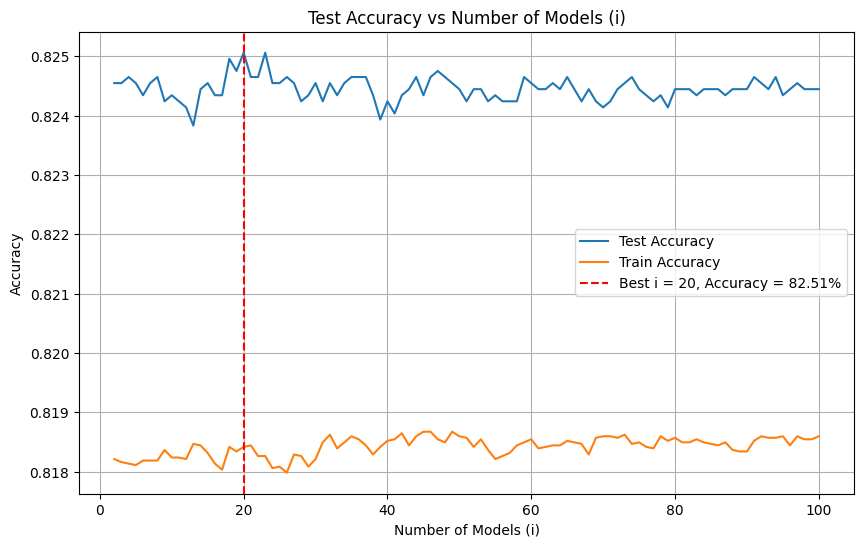

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(2, 101), acc_test, label='Test Accuracy')
plt.plot(range(2, 101), acc_train, label='Train Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Number of Models (i)')
plt.axvline(x=np.argmax(acc_test) + 2, color='r', linestyle='--', label=f'Best i = {np.argmax(acc_test) + 2}, Accuracy = {max(acc_test) * 100:.2f}%')
plt.legend()
plt.grid(True)
plt.show()

**Question:** Analyze the results.

**Your Answer:**

In this analysis, the optimal number of models for the ensemble is **20**. With 20 models, the training accuracy reaches **82.51%**, showing good generalization. Adding more models initially improves test performance by increasing prediction diversity. However, too many models lead to overfitting, where the ensemble memorizes rather than generalizes, decreasing effectiveness on new data. This highlights the need for a balance between model complexity and generalization, with a moderate number of models achieving the best results.